# penguins_privbayes stacking

Training on penguins dataset using privbayes model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declare real dataset and split into train/test

In [2]:
# Read penguins data
penguins_real = pd.read_csv("Data\penguins_size.csv")
penguins_real = penguins_real.dropna()
gen_method = "privbayes"
target = "species"

In [3]:
# Split penguins data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_real, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv("Data\penguins_train.csv", index=False)
penguins_test.to_csv("Data\penguins_test.csv", index=False)

In [3]:
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = penguins_real.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v1.csv", key="synth")

[2024-05-07T08:51:21.471652+0200][1240][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Generating for node: sex: 100%|██████████| 7/7 [00:00<00:00, 55.27it/s]            


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              40.9             13.7   
1       Adelie      Dream              37.3             17.8   
2       Gentoo     Biscoe              50.0             15.9   
3       Adelie     Biscoe              35.9             19.2   
4       Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
262  Chinstrap      Dream              50.9             19.1   
263     Adelie  Torgersen              37.2             19.4   
264     Adelie     Biscoe              39.7             17.7   
265     Gentoo     Biscoe              45.5             15.0   
266     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                214.0       4650.0  FEMALE  
1                191.0       3350.0  FEMALE  
2                224.0       5350.0    MALE  
3                189.0       3800.0 

# syn_v2

In [5]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate real and synthesized data
penguins_stack = pd.concat([penguins_real, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v1.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v1_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v1_test.csv", index=False)

In [6]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v2.csv", key="synth")

[2024-05-07T08:51:38.685012+0200][1240][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Generating for node: culmen_depth_mm: 100%|██████████| 7/7 [00:00<00:00, 33.11it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
235     Gentoo     Biscoe              45.1             14.5   
399  Chinstrap      Dream              49.2             20.7   
602     Adelie  Torgersen              39.1             14.7   
61      Adelie     Biscoe              41.1             19.1   
145     Adelie      Dream              41.5             18.5   
..         ...        ...               ...              ...   
71      Adelie  Torgersen              37.2             19.4   
106     Adelie     Biscoe              39.7             17.7   
270     Gentoo     Biscoe              45.5             15.0   
435  Chinstrap     Biscoe              50.5             16.2   
102     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
235              215.0       5000.0  FEMALE  
399              205.0       4775.0       .  
602              180.0       4100.0       .  
61               188.0       4100.0 

# syn_v3

In [7]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v2.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v2_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v2_test.csv", index=False)

In [8]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v3.csv", key="synth")

[2024-05-07T08:51:45.595648+0200][1240][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Generating for node: sex: 100%|██████████| 7/7 [00:00<00:00, 12.76it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1112  Chinstrap  Torgersen              46.7             15.2   
966   Chinstrap     Biscoe              43.2             18.7   
598      Gentoo     Biscoe              38.7             20.3   
170   Chinstrap      Dream              46.7             17.9   
275      Gentoo     Biscoe              45.7             13.9   
...         ...        ...               ...              ...   
1095  Chinstrap      Dream              50.6             19.2   
1130     Adelie     Biscoe              43.4             14.6   
1294  Chinstrap  Torgersen              36.9             15.4   
860   Chinstrap     Biscoe              49.4             18.0   
1126     Gentoo  Torgersen              38.3             16.2   

      flipper_length_mm  body_mass_g     sex  
1112              213.0       2700.0    MALE  
966               230.0       3775.0       .  
598               224.0       2850.0    MALE  
170               19

# syn_v4

In [9]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v3.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v3_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v4.csv", key="synth")

[2024-05-07T08:51:46.991983+0200][1240][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Generating for node: culmen_depth_mm: 100%|██████████| 7/7 [00:00<00:00, 10.72it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1011     Gentoo      Dream              45.1             16.4   
1273     Adelie      Dream              38.9             15.9   
69       Adelie  Torgersen              42.8             18.5   
2539     Adelie  Torgersen              36.5             20.6   
942      Adelie  Torgersen              42.7             15.8   
...         ...        ...               ...              ...   
1638     Gentoo  Torgersen              52.5             20.1   
1095  Chinstrap      Dream              50.6             19.2   
1130     Adelie     Biscoe              43.4             14.6   
1294  Chinstrap  Torgersen              36.9             15.4   
860   Chinstrap     Biscoe              49.4             18.0   

      flipper_length_mm  body_mass_g     sex  
1011              216.0       3350.0       .  
1273              208.0       5600.0    MALE  
69                195.0       4250.0    MALE  
2539              18

# syn_v5

In [11]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v4.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v4_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v5.csv", key="synth")

[2024-05-07T08:51:48.868962+0200][1240][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Generating for node: culmen_depth_mm: 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
5054     Gentoo  Torgersen              54.2             14.7   
120      Adelie  Torgersen              38.8             17.6   
2351  Chinstrap  Torgersen              49.3             19.5   
1907     Gentoo      Dream              46.3             21.2   
3648  Chinstrap      Dream              49.9             19.8   
...         ...        ...               ...              ...   
3092     Gentoo     Biscoe              34.6             20.8   
3772     Gentoo  Torgersen              36.3             19.0   
5191     Gentoo  Torgersen              44.0             20.8   
5226     Adelie     Biscoe              36.3             17.6   
860   Chinstrap     Biscoe              49.4             18.0   

      flipper_length_mm  body_mass_g     sex  
5054              198.0       4375.0       .  
120               191.0       3275.0  FEMALE  
2351              199.0       4675.0  FEMALE  
1907              20

# stack_v5 - Final stack

In [13]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v5.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v5_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(penguins_train).Train(plugin=gen_method)

[2024-05-07T08:51:52.297447+0200][1240][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 6/6 [00:01<00:00,  4.04it/s]


# stack_v5 (synth only)

In [15]:
# Remove the first 334 rows, equal to the real data, from stack_v5
penguins_stack_synth_only = penguins_stack.iloc[334:, :]

# Save to csv
penguins_stack_synth_only.to_csv(f"{gen_method}\penguins_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_synth_only_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(penguins_train).Train(plugin=gen_method)

[2024-05-07T08:51:54.186916+0200][1240][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 6/6 [00:01<00:00,  4.39it/s]


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

Generating for node: culmen_depth_mm: 100%|██████████| 7/7 [00:00<00:00, 25.78it/s]


[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
9876   Chinstrap     Biscoe              41.7             20.7   
10068     Gentoo     Biscoe              45.8             16.4   
10316     Adelie      Dream              51.4             13.5   
8622      Gentoo  Torgersen              42.5             15.6   
8994      Adelie      Dream              45.0             18.2   
...          ...        ...               ...              ...   
5734   Chinstrap      Dream              41.3             17.4   
5191      Gentoo  Torgersen              44.0             20.8   
5390      Adelie      Dream              50.3             16.7   
860    Chinstrap     Biscoe              49.4             18.0   
7270      Adelie     Biscoe              49.8             16.8   

       flipper_length_mm  body_mass_g     sex  
9876               215.0       4000.0       .  
10068              183.0       4550.0    MALE  
10316              221.0       3750.0  FEMALE  
8622

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

Generating for node: flipper_length_mm:   0%|          | 0/7 [00:00<?, ?it/s]WARNING:pgmpy:Probability values don't exactly sum to 1. Differ by: 1.2072565169773952e-12. Adjusting values.


Generating for node: culmen_depth_mm: 100%|██████████| 7/7 [00:00<00:00, 29.49it/s]


[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
1381      Gentoo     Biscoe              41.0             15.5   
7695      Gentoo      Dream              49.8             14.0   
10167     Gentoo  Torgersen              43.5             15.0   
5550      Adelie      Dream              47.6             18.7   
1100      Gentoo  Torgersen              43.2             18.9   
...          ...        ...               ...              ...   
6068   Chinstrap      Dream              34.6             20.1   
5525   Chinstrap     Biscoe              51.1             18.4   
5724      Adelie      Dream              44.0             17.4   
1194      Adelie  Torgersen              33.1             16.7   
7604      Adelie     Biscoe              50.5             13.8   

       flipper_length_mm  body_mass_g     sex  
1381               208.0       5650.0    MALE  
7695               201.0       3725.0       .  
10167              199.0       3600.0       .  
5550

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [4]:
# Read train and test data (this is base/real train and test data, not the stack data)
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Count of penguins_real
real_count = penguins_real.shape[0]

# Read syn_v1 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_real = S.evaluate(penguins_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016147,0.009671,0.983853,0.009671
1,pca_eigval_diff,u,0.466607,NaN,0.533393,NaN
2,pca_eigvec_ang,u,1.321666,NaN,0.579301,NaN
3,avg_cio,u,0.399145,0.143373,0.399145,0.143373
4,corr_mat_diff,u,3.065510,NaN,0.854023,NaN
5,mutual_inf_diff,u,0.901467,NaN,0.957073,NaN
6,ks_tvd_stat,u,0.116325,0.028655,0.883675,0.028655
7,frac_ks_sigs,u,0.428571,NaN,0.571429,NaN
8,avg_h_dist,u,0.079523,0.048093,0.920477,0.048093
9,avg_pMSE,u,0.026157,0.001627,0.895373,0.006507


# Eval on syn_2

In [5]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v2_sample.csv", index=False)

In [6]:
# Read syn_v2 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v2_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v1 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.018047,0.009575,0.981953,0.009575
1,pca_eigval_diff,u,0.471022,NaN,0.528978,NaN
2,pca_eigvec_ang,u,1.458468,NaN,0.535755,NaN
3,avg_cio,u,0.464792,0.208664,0.464792,0.208664
4,corr_mat_diff,u,3.143834,NaN,0.850294,NaN
5,mutual_inf_diff,u,0.892297,NaN,0.957510,NaN
6,ks_tvd_stat,u,0.133694,0.037514,0.866306,0.037514
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.094578,0.055281,0.905422,0.055281
9,avg_pMSE,u,0.046868,0.002845,0.812526,0.011380


# Eval on syn_3

In [7]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v3_sample.csv", index=False)

In [8]:
# Read syn_v3 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v3_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v2 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.026197,0.009480,0.973803,0.009480
1,pca_eigval_diff,u,0.445573,NaN,0.554427,NaN
2,pca_eigvec_ang,u,0.796646,NaN,0.746420,NaN
3,avg_cio,u,0.144160,0.144160,0.144160,0.144160
4,corr_mat_diff,u,3.034192,NaN,0.855515,NaN
5,mutual_inf_diff,u,0.893758,NaN,0.957440,NaN
6,ks_tvd_stat,u,0.134118,0.027648,0.865882,0.027648
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.084246,0.050701,0.915754,0.050701
9,avg_pMSE,u,0.038630,0.002782,0.845481,0.011127


# Eval on syn_4

In [9]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v4_sample.csv", index=False)

In [10]:
# Read syn_v4 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v4_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v3 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.013141,0.009568,0.986859,0.009568
1,pca_eigval_diff,u,0.455673,NaN,0.544327,NaN
2,pca_eigvec_ang,u,1.570777,NaN,0.500006,NaN
3,avg_cio,u,0.517647,0.096869,0.517647,0.096869
4,corr_mat_diff,u,3.156731,NaN,0.849679,NaN
5,mutual_inf_diff,u,0.853746,NaN,0.959345,NaN
6,ks_tvd_stat,u,0.113791,0.025377,0.886209,0.025377
7,frac_ks_sigs,u,0.428571,NaN,0.571429,NaN
8,avg_h_dist,u,0.076341,0.046211,0.923659,0.046211
9,avg_pMSE,u,0.028312,0.002658,0.886754,0.010633


# Eval on syn_5

In [11]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v5_sample.csv", index=False)

In [12]:
# Read syn_v5 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v5_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v4 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.020206,0.009647,0.979794,0.009647
1,pca_eigval_diff,u,0.485289,NaN,0.514711,NaN
2,pca_eigvec_ang,u,0.854488,NaN,0.728008,NaN
3,avg_cio,u,0.246166,0.119367,0.246166,0.119367
4,corr_mat_diff,u,3.074342,NaN,0.853603,NaN
5,mutual_inf_diff,u,0.875190,NaN,0.958324,NaN
6,ks_tvd_stat,u,0.116982,0.026353,0.883018,0.026353
7,frac_ks_sigs,u,0.428571,NaN,0.571429,NaN
8,avg_h_dist,u,0.077898,0.047334,0.922102,0.047334
9,avg_pMSE,u,0.029807,0.002065,0.880772,0.008260


# Eval on stack_v5 to real data

In [13]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_v5_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v5 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v5

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.017661,0.009631,0.982339,0.009631
1,pca_eigval_diff,u,0.470225,NaN,0.529775,NaN
2,pca_eigvec_ang,u,1.403329,NaN,0.553306,NaN
3,avg_cio,u,0.425279,0.196169,0.425279,0.196169
4,corr_mat_diff,u,3.112742,NaN,0.851774,NaN
5,mutual_inf_diff,u,0.847124,NaN,0.959661,NaN
6,ks_tvd_stat,u,0.130523,0.031141,0.869477,0.031141
7,frac_ks_sigs,u,0.428571,NaN,0.571429,NaN
8,avg_h_dist,u,0.089863,0.050526,0.910137,0.050526
9,avg_pMSE,u,0.036612,0.001037,0.853553,0.004147


# Eval on stack_synth_only to real data

In [14]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_synth_only_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_synth_only = S.evaluate(penguins_syn,target,"full_eval")
res_stack_synth_only

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.032824,0.009559,0.967176,0.009559
1,pca_eigval_diff,u,0.476233,NaN,0.523767,NaN
2,pca_eigvec_ang,u,1.547351,NaN,0.507463,NaN
3,avg_cio,u,0.073513,0.073513,0.073513,0.073513
4,corr_mat_diff,u,3.117474,NaN,0.851549,NaN
5,mutual_inf_diff,u,0.906079,NaN,0.956853,NaN
6,ks_tvd_stat,u,0.134034,0.030313,0.865966,0.030313
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.082115,0.051259,0.917885,0.051259
9,avg_pMSE,u,0.036190,0.001111,0.855242,0.004444


# Multiple plots for evaluation comparisons

In [15]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [16]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_v5, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_v5", "res_stack_synth_only"]

In [17]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

# Save to csv
privacy_plot.to_csv(f"{gen_method}\privacy_plot.csv")

privacy_plot

,eps_identif_risk,att_discl_risk,mia_cls_risk
res_real,0.044944,0.223268,0.905882
res_stack_v1,0.056180,0.263901,0.864706
res_stack_v2,0.029963,0.274166,0.900000
res_stack_v3,0.056180,0.318221,0.894118
res_stack_v4,0.041199,0.300684,0.882353
res_stack_v5,0.052434,0.286997,0.911765
res_stack_synth_only,0.022472,0.211292,0.805882


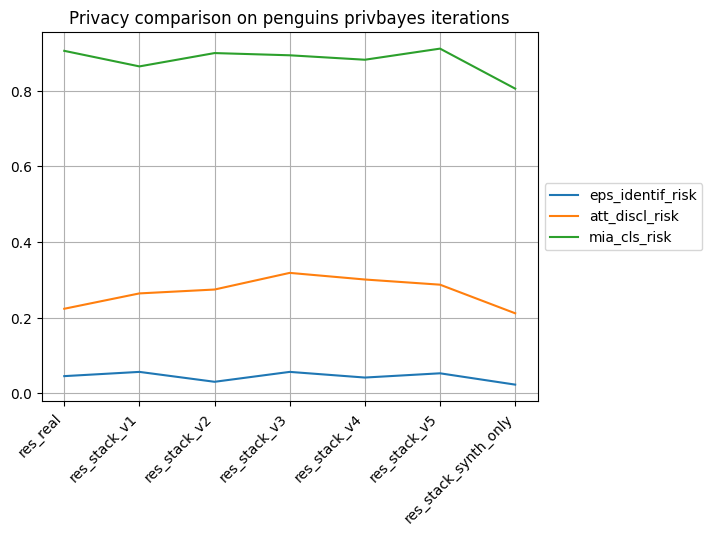

In [18]:
privacy_plot.plot.line()
plt.title("Privacy comparison on penguins privbayes iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [19]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

# Save to csv
DCR_plot.to_csv(f"{gen_method}\DCR_plot.csv")

DCR_plot

,median_DCR
res_real,8.552233
res_stack_v1,8.754994
res_stack_v2,8.496868
res_stack_v3,7.792528
res_stack_v4,8.442589
res_stack_v5,8.694099
res_stack_synth_only,8.657654


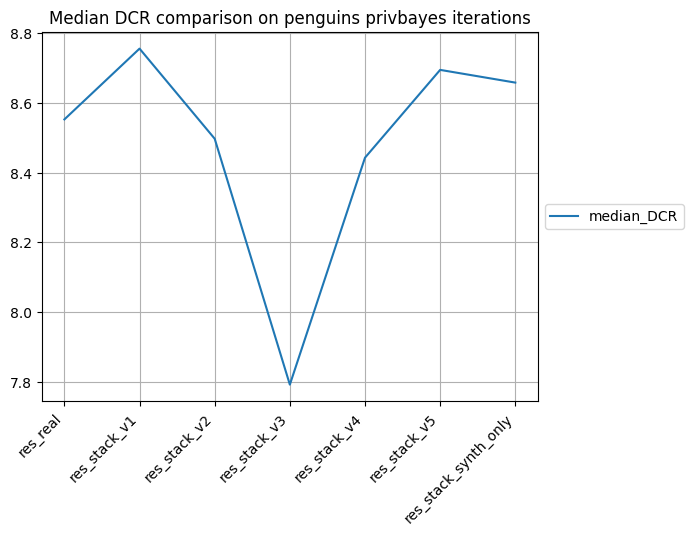

In [20]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on penguins privbayes iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [21]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "avg_pMSE",
                                     "cls_F1_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["avg_pMSE", "val"],
                                    evals.loc["cls_F1_diff", "val"]]


utility_plot

,avg_dwm_diff,avg_pMSE,cls_F1_diff
res_real,0.016147,0.026157,0.462369
res_stack_v1,0.018047,0.046868,0.607739
res_stack_v2,0.026197,0.038630,0.442575
res_stack_v3,0.013141,0.028312,0.369672
res_stack_v4,0.020206,0.029807,0.382058
res_stack_v5,0.017661,0.036612,0.440968
res_stack_synth_only,0.032824,0.036190,0.546506


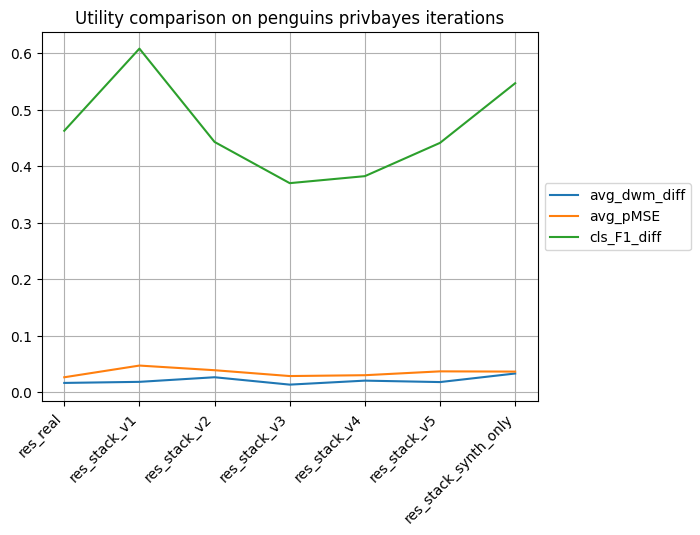

In [22]:
utility_plot.plot.line()
plt.title("Utility comparison on penguins privbayes iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [23]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"]]

# Save to csv
matrix_diff_plot.to_csv(f"{gen_method}\matrix_diff_plot.csv", index=False)

matrix_diff_plot

,corr_mat_diff
res_real,3.065510
res_stack_v1,3.143834
res_stack_v2,3.034192
res_stack_v3,3.156731
res_stack_v4,3.074342
res_stack_v5,3.112742
res_stack_synth_only,3.117474


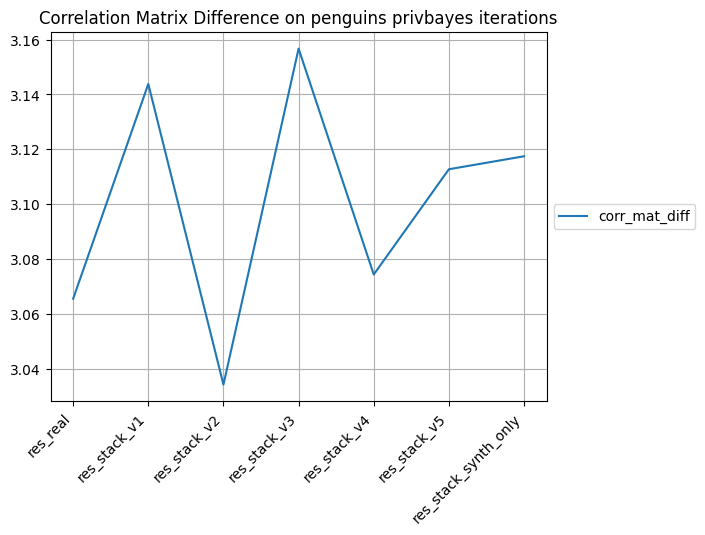

In [24]:
matrix_diff_plot.plot.line()
plt.title("Correlation Matrix Difference on penguins privbayes iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [25]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.016147,0.466607,1.321666,0.399145,3.065510,0.901467,0.116325,0.428571,0.079523,0.026157,0.743255,0.043978,0.905672,-0.040995,0.462369,0.485075,0.003745,0.044944,0.905882,0.223268
res_stack_v1,0.018047,0.471022,1.458468,0.464792,3.143834,0.892297,0.133694,0.571429,0.094578,0.046868,0.747899,-0.001228,0.924006,-0.039678,0.607739,0.511194,0.003745,0.056180,0.864706,0.263901
res_stack_v2,0.026197,0.445573,0.796646,0.144160,3.034192,0.893758,0.134118,0.714286,0.084246,0.038630,0.740459,-0.043158,0.928132,-0.072909,0.442575,0.455224,0.003745,0.029963,0.900000,0.274166
res_stack_v3,0.013141,0.455673,1.570777,0.517647,3.156731,0.853746,0.113791,0.428571,0.076341,0.028312,0.730844,0.022138,0.914648,-0.069126,0.369672,0.343284,0.000000,0.056180,0.894118,0.318221
res_stack_v4,0.020206,0.485289,0.854488,0.246166,3.074342,0.875190,0.116982,0.428571,0.077898,0.029807,0.799209,-0.028589,0.913532,-0.062289,0.382058,0.384328,0.000000,0.041199,0.882353,0.300684
res_stack_v5,0.017661,0.470225,1.403329,0.425279,3.112742,0.847124,0.130523,0.428571,0.089863,0.036612,0.767949,0.055126,0.904920,-0.056164,0.440968,0.429104,0.000000,0.052434,0.911765,0.286997
res_stack_synth_only,0.032824,0.476233,1.547351,0.073513,3.117474,0.906079,0.134034,0.714286,0.082115,0.036190,0.792163,0.016162,0.937866,-0.067965,0.546506,0.656716,0.000000,0.022472,0.805882,0.211292


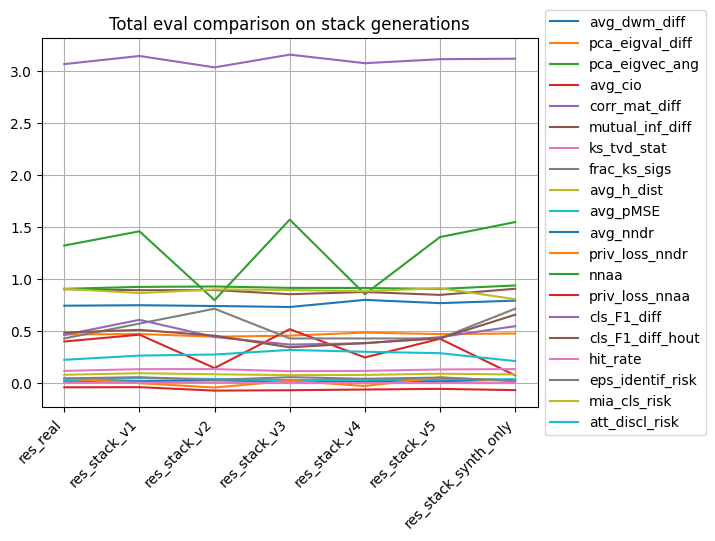

In [26]:
total_eval.plot.line()
plt.title("Total eval comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [27]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

# Save to csv
overall_res.to_csv(f"{gen_method}\overall_res.csv", index=False)

overall_res

,Stacks,Utility,Privacy
0,res_real,0.671125,0.810055
1,res_stack_v1,0.637628,0.814808
2,res_stack_v2,0.639897,0.802065
3,res_stack_v3,0.692178,0.796383
4,res_stack_v4,0.681385,0.810512
5,res_stack_v5,0.671672,0.800683
6,res_stack_synth_only,0.589542,0.833549


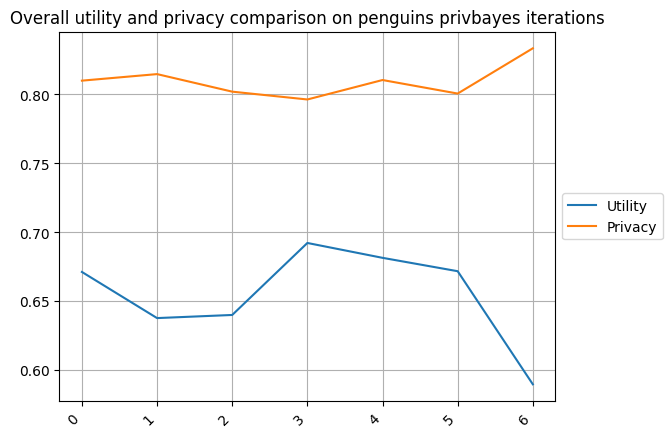

In [28]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on penguins privbayes iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()